<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분(입력된 값의 차원을 축소)
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape=(28,28,1), activation='relu')) # 컨볼루션 과정 처리(노드 수는 3, 커널 크기는 3x3, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다., input값의 크기는 28x28, 활성화 함수는 relu)
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 28x28 -> 14x14
autoencoder.add(Conv2D(8, kernel_size =3, activation='relu', padding='same')) # 컨볼루션 과정 처리(노드 수는 8, 커널 크기는 3x3, 활성화함수는 relu, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다.)
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))  # 14x14 -> 7x7 (padding이 적용되어 빈자리를 0으로 채워줌, 7은 홀수여서 커널이 2칸씩 이동할 수 없음)
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) # 컨볼루션 과정 처리(노드 수는 8, 커널 크기는 3x3, stride=2이므로 커널 윈도를 2칸씩 움직이기, 활성화함수는 relu, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다.)


# 디코딩 부분(다시 차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값을 내보냄)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))  # 컨볼루션 과정 처리(노드 수는 8, 커널 크기는 3x3, 활성화함수는 relu, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다.)
autoencoder.add(UpSampling2D()) # 4x4 -> 8x8
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu')) # 컨볼루션 과정 처리(노드 수는 16, 커널 크기는 3x3, 활성화함수는 relu, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다.)
autoencoder.add(UpSampling2D()) # 8x8 -> 16x16
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # 컨볼루션 과정 처리(노드 수는 16, 커널 크기는 3x3, 활성화함수는 relu), padding 옵션이 없으므로 커널이 적용되면서 크기가 줄어듬
autoencoder.add(UpSampling2D()) # 14x14(바로 윗줄에 padding 옵션이 없으므로 줄어듬) -> 28x28
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')) # 컨볼루션 과정 처리(노드 수는 1, 커널 크기는 3x3, 활성화함수는 sigmoid, padding='same'이므로 입력과 출력의 크기가 다를 경우 자동으로 크기를 조절한다.)

In [4]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [5]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 테스트할 이미지를 랜덤하게 불러옵니다.
random_test = np.random.randint(X_test.shape[0], size=5)  

Epoch 1/50
469/469 [==============================] - 19s 8ms/step - loss: 0.1969 - val_loss: 0.1258
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1172 - val_loss: 0.1093
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1067 - val_loss: 0.1029
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1020 - val_loss: 0.0990
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0990 - val_loss: 0.0966
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0966 - val_loss: 0.0944
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0946 - val_loss: 0.0925
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0929 - val_loss: 0.0912
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0914 - val_loss: 0.0896
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0901 - val_loss: 0.088

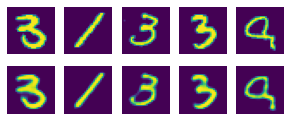

In [6]:
#학습된 결과를 출력하는 부분입니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()

# 첫 번째 줄 사진들이 테스트로 사용된 원본 이미지
# 두 번째 줄 사진들이 원본의 특징을 고스란히 담은 채 만들어진 오토인코더 이미지